## About {-}
Python translation of bbm_space_eof_try.m using chatgpt. Comments below the plots are my own.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.linalg import norm
import sys
import os

sys.path.append(os.path.abspath("/home/hana/Documents/dalhousie/training/CREATE/Data_Module/codes/eof-analysis"))
from eofs import eofs

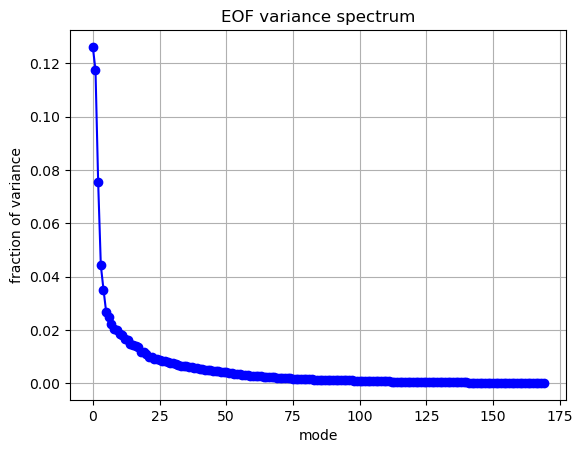

In [2]:
# ==============================
# Basic EOF that captures spatial distribution of temporal variance
# ==============================

# Load data
mat = loadmat("../bbm_tidecrittry.mat")
data = mat["B2s"]  # adjust key if needed

num_modes = 170
M, N = data.shape

# Remove mean (along time dimension, MATLAB dim=2)
data_noav = data - data.mean(axis=1, keepdims=True)

# Coordinates (bbm_tidecrittry case)
myx = np.arange(0.5, 2047.5 + 1) / 4096
mytime = np.arange(0, 600)

# coeff - Time coefficients
# lambda_vals - Eigenvalues (unnormalized, descending order)
# u - Spatial EOFs (eigenvectors as columns)
# cumul_approx - Cumulative approximations using 1..k modes
lambda_vals, u, coeff, cumul_approx = eofs(data_noav, num_modes)

# ==============================
# Figure 1: Eigenvalue spectrum
# ==============================

plt.figure(1)
plt.clf()
plt.plot(lambda_vals / lambda_vals.sum(), "bo-")
plt.xlabel("mode")
plt.ylabel("fraction of variance")
plt.title("EOF variance spectrum")
plt.grid(True)

EOF analysis is performed on the data set generated from the forced BBM equation, which models wave generation by tidal flow over a ridge. Here we look at the spatial distribution of the temporal variance. The above plot is a scree plot that shows the rapid decay of eigenvalue contributions to variance in the data set. The first five eigenvalues capture about 40% of the variance in the data set. The remaining eigenvalues provide minimal information about the data set.

In [5]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Jun  4 11:10:17 2020',
 '__version__': '1.0',
 '__globals__': [],
 'B1s': array([[ 2.27292143e-15,  4.54248184e-15,  6.80987385e-15, ...,
          8.92064392e-03,  6.64851684e-03,  4.20575618e-03],
        [-2.26023627e-15, -4.51656941e-15, -6.77105941e-15, ...,
          9.68210642e-03,  7.62783607e-03,  5.23153728e-03],
        [ 2.27075303e-15,  4.54150606e-15,  6.81041595e-15, ...,
          1.03263222e-02,  8.54680298e-03,  6.26289121e-03],
        ...,
        [-2.28172380e-15, -4.58937359e-15, -6.91702013e-15, ...,
          6.14072653e-03,  3.60644869e-03,  1.44925471e-03],
        [ 2.25491013e-15,  4.48588649e-15,  6.68936477e-15, ...,
          7.12711413e-03,  4.61032601e-03,  2.28574942e-03],
        [-2.27213539e-15, -4.55928698e-15, -6.86432790e-15, ...,
          8.06171218e-03,  5.63375825e-03,  3.21413307e-03]],
       shape=(2048, 600)),
 'B2s': array([[-3.99311660e-16, -8.01333826e-16, -1.20509

In [3]:
#### ==============================
# Error analysis
# ==============================

myerr2 = np.zeros(num_modes)
myerrinf = np.zeros(num_modes)

for ii in range(num_modes):
    myapp = cumul_approx[ii]
    myerrnow = (myapp - data_noav).T
    myerr2[ii] = norm(myerrnow, 2)
    myerrinf[ii] = norm(myerrnow, np.inf)

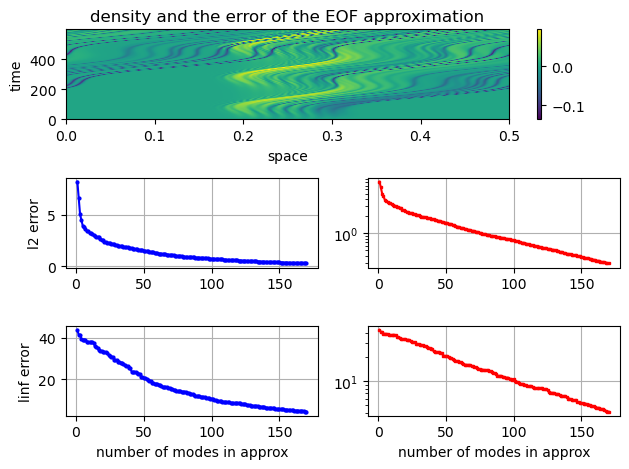

In [4]:
# ==============================
# Figure 2: Data and errors
# ==============================

plt.figure(2)
plt.clf()

plt.subplot(3, 1, 1)
plt.pcolormesh(myx, mytime, data.T, shading="auto")
plt.xlabel('space')
plt.ylabel('time')
plt.colorbar()
plt.title("density and the error of the EOF approximation")

plt.subplot(3, 2, 3)
plt.plot(np.arange(1, num_modes + 1), myerr2, "bo-", markersize=2)
plt.grid(True)
plt.ylabel("l2 error")

plt.subplot(3, 2, 4)
plt.semilogy(np.arange(1, num_modes + 1), myerr2, "rs-", markersize=2)
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(np.arange(1, num_modes + 1), myerrinf, "bo-", markersize=2)
plt.grid(True)
plt.ylabel("linf error")
plt.xlabel("number of modes in approx")

plt.subplot(3, 2, 6)
plt.semilogy(np.arange(1, num_modes + 1), myerrinf, "rs-", markersize=2)
plt.grid(True)
plt.xlabel("number of modes in approx")

plt.tight_layout()

The BBM data set is plotted in the upper panel. The error of the EOF approximation is calculated as the difference between the de-meaned data set and the cumulative approximation. From this error we get the order-2 norm error and the order-inf norm error. The order-2 error shows a steep drop-off as the number of modes in the approximation increases, while the order-inf error decreases more gradually. The order-2 error also has a smaller scale than the order-inf error.

In [5]:
# Repeat error analysis using different norm
myerr1 = np.zeros(num_modes)
myerrninf = np.zeros(num_modes)

for ii in range(num_modes):
    myapp = cumul_approx[ii]
    myerrnow = (myapp - data_noav).T
    myerr1[ii] = norm(myerrnow, 1)
    myerrninf[ii] = norm(myerrnow, -np.inf)

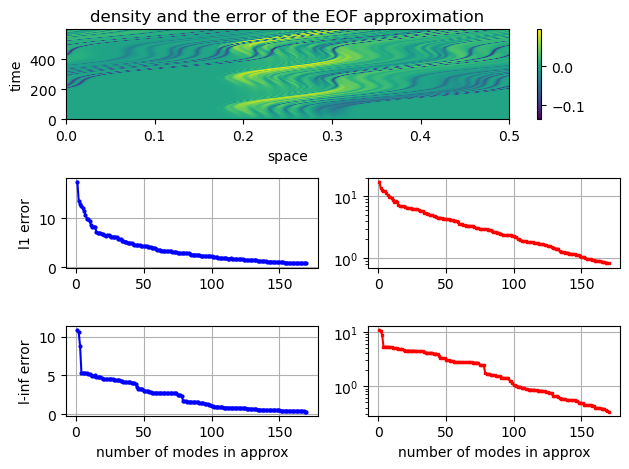

In [6]:
# ==============================
# Figure 2.5: Data and errors
# ==============================

plt.figure(2)
plt.clf()

plt.subplot(3, 1, 1)
plt.pcolormesh(myx, mytime, data.T, shading="auto")
plt.xlabel('space')
plt.ylabel('time')
plt.colorbar()
plt.title("density and the error of the EOF approximation")

plt.subplot(3, 2, 3)
plt.plot(np.arange(1, num_modes + 1), myerr1, "bo-", markersize=2)
plt.grid(True)
plt.ylabel("l1 error")

plt.subplot(3, 2, 4)
plt.semilogy(np.arange(1, num_modes + 1), myerr1, "rs-", markersize=2)
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(np.arange(1, num_modes + 1), myerrninf, "bo-", markersize=2)
plt.grid(True)
plt.ylabel("l-inf error")
plt.xlabel("number of modes in approx")

plt.subplot(3, 2, 6)
plt.semilogy(np.arange(1, num_modes + 1), myerrninf, "rs-", markersize=2)
plt.grid(True)
plt.xlabel("number of modes in approx")

plt.tight_layout()

The order-1 error doesn't drop off as steeply as the order-2 error. The order-minus-inf error exhibits a sharp drop-off and staircase structure that is visible at the log scale. Error magnitude at early modes are similar for both.

Text(0.5, 0, 'space')

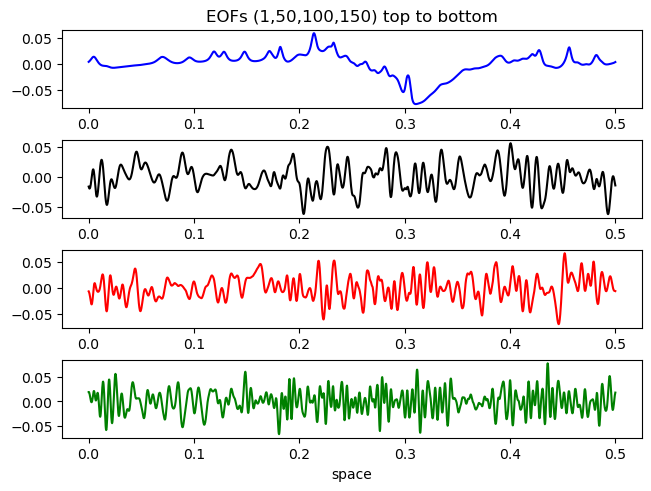

In [7]:
# ==============================
# Figure 3: Spatial EOFs
# ==============================

plt.figure(3, layout='constrained')
plt.clf()

plt.subplot(4, 1, 1)
plt.plot(myx, u[:, 0], "b-")
plt.title("EOFs (1,50,100,150) top to bottom")

plt.subplot(4, 1, 2)
plt.plot(myx, u[:, 49], "k-")

plt.subplot(4, 1, 3)
plt.plot(myx, u[:, 99], "r-")

plt.subplot(4, 1, 4)
plt.plot(myx, u[:, 149], "g-")
plt.xlabel("space")

The first EOF captures the largest-scale variability in space. Subsequent EOFs capture increasingly finer-scale variability.

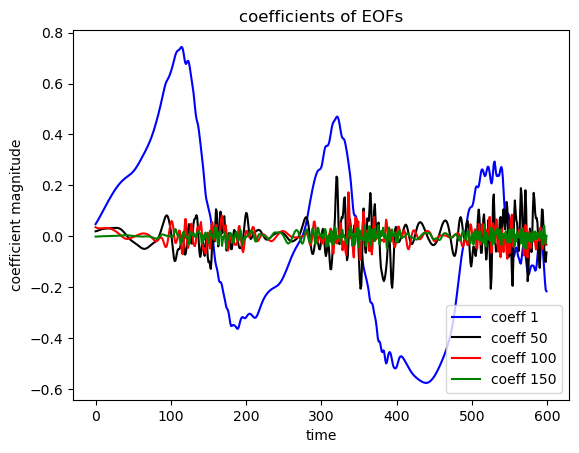

In [8]:
# ==============================
# Figure 4: EOF coefficients
# ==============================

plt.figure(4)
plt.clf()

plt.plot(mytime, coeff[0, :], "b-",
         mytime, coeff[49, :], "k-",
         mytime, coeff[99, :], "r-",
         mytime, coeff[149, :], "g-")
plt.xlabel('time')
plt.ylabel('coefficient magnitude')
plt.title("coefficients of EOFs")
plt.legend(
    ["coeff 1", "coeff 50", "coeff 100", "coeff 150"],
    loc="lower right"
)

plt.show()

This plot shows the coefficient magnitude varying with time. Coefficient 1 attains the largest magnitude and varies the slowest. It shows a pretty regular oscillation trending downward. Coefficients 50, 100, and 150 vary faster.